In [10]:
# The code was removed by Watson Studio for sharing.

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
# The code was removed by Watson Studio for sharing.

,SEVERITYCODE,X,Y,ADDRTYPE,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,...,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLDESC,HITPARKEDCAR,Location1,coordinates,county,dayofweek
0,2,-122.323148,47.703140,Intersection,5TH AVE NE AND NE 103RD ST,Injury Collision,Angles,2,0,0,...,0,2,1,0,Entering at angle,N,Seattle,"47.70314032,-122.32314840000002",King County,2
1,1,-122.347294,47.647172,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Property Damage Only Collision,Sideswipe,2,0,0,...,0,1,1,1,From same direction - both going straight - bo...,N,Seattle,"47.64717249,-122.3472943",King County,2
2,1,-122.334540,47.607871,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Property Damage Only Collision,Parked Car,4,0,0,...,0,2,0,0,One parked--one moving,N,Seattle,"47.60787143,-122.33453999999999",King County,3
3,1,-122.334803,47.604803,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,Property Damage Only Collision,Other,3,0,0,...,0,0,0,0,From same direction - all others,N,Seattle,"47.60480289,-122.3348033",King County,4
4,2,-122.306426,47.545739,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,Injury Collision,Angles,2,0,0,...,0,1,1,0,Entering at angle,N,Seattle,"47.54573946,-122.3064263",King County,2


In [3]:
df['ADDRTYPE'].value_counts()

Block           107379
Intersection     61267
Alley              593
Name: ADDRTYPE, dtype: int64

In [4]:
df.drop(df[df['ADDRTYPE']=='Alley'].index,axis = 0, inplace = True)

In [9]:
df['dayofweek'].value_counts()

4    28067
3    25510
2    24960
1    24744
5    23834
0    22640
6    18891
Name: dayofweek, dtype: int64

In [11]:
project.save_data("Transform-Data-1.csv", data=df.to_csv(index=False),overwrite=True)

{'file_name': 'Transform-Data-1.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'corseracapstone-donotdelete-pr-xntjynexnacup6',
 'asset_id': '9a4703a6-e48d-41e8-b998-62e57b3a1539'}

In [12]:
from sklearn.utils import resample

as we have more data for severity code -1 where it is Property Damage Only Collision we need to down size it so that a bais is not created

In [14]:
df_maj = df[df.SEVERITYCODE == 1]
df_min = df[df.SEVERITYCODE == 2]

df_maj_dsample = resample(df_maj, replace = False, n_samples = 55462, random_state = 100)

balanced_df = pd.concat([df_maj_dsample, df_min])

balanced_df.SEVERITYCODE.value_counts()

2    55462
1    55462
Name: SEVERITYCODE, dtype: int64

In [15]:
project.save_data("Balanced-Data.csv", data=balanced_df.to_csv(index=False),overwrite=True)

{'file_name': 'Balanced-Data.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'corseracapstone-donotdelete-pr-xntjynexnacup6',
 'asset_id': 'add379b7-8660-4ea7-b59f-de1429bfad51'}

In [16]:
balanced_df.head()

,SEVERITYCODE,X,Y,ADDRTYPE,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,...,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLDESC,HITPARKEDCAR,Location1,coordinates,county,dayofweek
150737,1,-122.318762,47.605200,Block,E TERRACE ST BETWEEN 10TH AVE AND 11TH AVE,Property Damage Only Collision,Parked Car,4,0,0,...,0,3,3,1,One parked--one moving,Y,Seattle,"47.60520035,-122.31876240000001",King County,6
123570,1,-122.308901,47.664872,Block,NE 50TH ST BETWEEN 17TH NB AVE NE AND 18TH AVE NE,Property Damage Only Collision,Rear Ended,0,0,0,...,0,1,1,1,From same direction - both going straight - on...,N,Seattle,"47.66487154,-122.3089014",King County,4
41172,1,-122.349424,47.555695,Block,WEST MARGINAL WAY SW BETWEEN PUGET WAY SW AND ...,Property Damage Only Collision,Other,1,0,0,...,0,1,0,1,Fixed object,N,Seattle,"47.55569473,-122.34942350000001",King County,5
50474,1,-122.277101,47.638024,Block,43RD AVE E BETWEEN E NEWTON ST AND E LYNN ST,Property Damage Only Collision,Parked Car,2,0,0,...,0,0,0,0,One parked--one moving,N,Seattle,"47.63802428,-122.27710079999999",King County,2
132174,1,-122.323239,47.547024,Block,S MICHIGAN ST BETWEEN 7TH AVE S AND CORSON AVE S,Property Damage Only Collision,Rear Ended,2,0,0,...,0,1,1,1,From same direction - both going straight - on...,N,Seattle,"47.5470245,-122.3232392",King County,2


now lets creat different model and check it accuracy

In [17]:
Feature = balanced_df[['ROADCOND','LIGHTCOND','WEATHER','UNDERINFL','dayofweek']]
X = Feature
X= preprocessing.StandardScaler().fit(X).transform(X)
y = balanced_df['SEVERITYCODE'].values


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=10)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (77646, 5) (77646,)
Test set: (33278, 5) (33278,)


In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks=20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.50588978, 0.50285474, 0.50763267, 0.50796322, 0.50739227,
       0.50327544, 0.50204339, 0.50264439, 0.50405673, 0.50462768,
       0.50429713, 0.50594988, 0.50844402, 0.50790312, 0.51042731,
       0.50498828, 0.51195985, 0.50519863, 0.50964601])

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks=30
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(20,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.50628043,
       0.50946571, 0.51111846, 0.51006671, 0.51159925, 0.51208005,
       0.50649077, 0.50829377, 0.50907506, 0.50931546])

K nearest neighbour best fit is when n = 17 so lets train our model with n = 17

In [27]:
neigh = KNeighborsClassifier(n_neighbors = 17).fit(X_train,y_train)
yhat=neigh.predict(X_test)

In [22]:
from sklearn.tree import DecisionTreeClassifier
for i in range(1,15):
    drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = i)
    drugTree.fit(X_train,y_train)
    predTree = drugTree.predict(X_test)
    print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.508804615661999
DecisionTrees's Accuracy:  0.5191417753470762
DecisionTrees's Accuracy:  0.5197127231203799
DecisionTrees's Accuracy:  0.5196826732375743
DecisionTrees's Accuracy:  0.5202235711280726
DecisionTrees's Accuracy:  0.5191718252298816
DecisionTrees's Accuracy:  0.5202836708936835
DecisionTrees's Accuracy:  0.5229881603461747
DecisionTrees's Accuracy:  0.5245507542520584
DecisionTrees's Accuracy:  0.5224472624556764
DecisionTrees's Accuracy:  0.5225374121040928
DecisionTrees's Accuracy:  0.5229280605805637
DecisionTrees's Accuracy:  0.5214556163230963
DecisionTrees's Accuracy:  0.5214856662059018


Decision tree best fit is when tree depth = 9 so lets train our decision tree model with depth =9

In [28]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 9)
drugTree.fit(X_train,y_train)
predTree = drugTree.predict(X_test)
print(predTree.max())
print(predTree.min())

2
1


In [23]:
from sklearn import svm
from sklearn.metrics import jaccard_similarity_score
linear = svm.SVC(kernel='linear')
linear.fit(X_train, y_train) 
predlinear = linear.predict(X_test)
jaccard_similarity_score(y_test, predlinear)

0.5101268105054391

In [24]:
rfb = svm.SVC(kernel='rbf')
rfb.fit(X_train, y_train) 
predrfb = rfb.predict(X_test)
jaccard_similarity_score(y_test, predrfb)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.5214856662059018

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
predLR = LR.predict(X_test)
jaccard_similarity_score(y_test, predLR)

0.516106737183725

In [26]:
from sklearn.naive_bayes import GaussianNB
gnb =GaussianNB()
gnb.fit(X_train,y_train)
predgn = gnb.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test,predgn))

Accuracy:  0.5117194542941282


In [29]:
from sklearn.metrics import f1_score

In [30]:
print("KNN - Jaccard accuracy :",jaccard_similarity_score(y_test, yhat))
print("KNN - F1-score accuracy :",f1_score(y_test, yhat, average='weighted') )

KNN - Jaccard accuracy : 0.5119598533565719
KNN - F1-score accuracy : 0.5110853376169106


In [31]:
print("Decision Tree - Jaccard accuracy :",jaccard_similarity_score(y_test, predTree))
print("Decision Tree - F1-score accuracy :",f1_score(y_test, predTree, average='weighted') )

Decision Tree - Jaccard accuracy : 0.5244906544864475
Decision Tree - F1-score accuracy : 0.5201961916491737


In [32]:
print("SVM -linear - Jaccard accuracy :",jaccard_similarity_score(y_test, predlinear))
print("SVM -linear - F1-score accuracy :",f1_score(y_test, predlinear, average='weighted') )

SVM -linear - Jaccard accuracy : 0.5101268105054391
SVM -linear - F1-score accuracy : 0.5007023535962081


In [33]:
print("logloss - Jaccard accuracy :",jaccard_similarity_score(y_test, predLR))
print("logloss - F1-score accuracy :",f1_score(y_test, predLR, average='weighted') )

logloss - Jaccard accuracy : 0.516106737183725
logloss - F1-score accuracy : 0.5129588256587537


In [34]:
print("Naive Baise - Jaccard accuracy :",jaccard_similarity_score(y_test, predgn))
print("Naive Baise - F1-score accuracy :",f1_score(y_test, predgn, average='weighted') )

Naive Baise - Jaccard accuracy : 0.5117194542941282
Naive Baise - F1-score accuracy : 0.46040773168160287


In [35]:
dfpred=pd.DataFrame()

In [36]:
dfpred['Algorithm']=['KNN','Decision Tree','SVM','LogLoss','Naive Baise']
dfpred['Jaccard Accuracy']=[0.5119598533565719,0.5244906544864475,0.5101268105054391,0.516106737183725,0.5117194542941282]
dfpred['F1-score']=[0.5110853376169106,0.5201961916491737,0.5007023535962081,0.5129588256587537,0.46040773168160287]

In [37]:
dfpred=dfpred.set_index("Algorithm")

In [38]:
dfpred.head()

,Jaccard Accuracy,F1-score
Algorithm,,
KNN,0.511960,0.511085
Decision Tree,0.524491,0.520196
SVM,0.510127,0.500702
LogLoss,0.516107,0.512959
Naive Baise,0.511719,0.460408


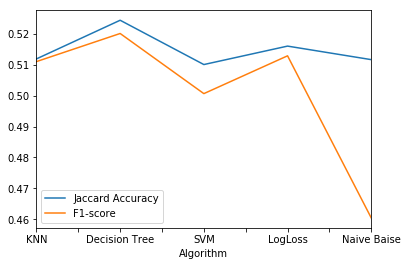

In [39]:
dfpred.plot()

as we can see we are getting best accuracy with decision tree so we will use Decision tree for traing our model and deploying it through Flask API
I have created different notebooks for Data Cleaning/Transformation, Data Visualization,Data Modeling so Please have a look at that as well